# Image Processing Task

## Downloading/Importing the necessary libraries, mounting g-drive to access image data




In [1]:
!pip3 install slideio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#In order to avoid repeatedly uploading to google colab, I mounted my google drive with the svs files uploaded to them after downloading
# If the following code does not run in your system, kindly comment out this cell and make changes to the image path wherever defined as required.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import slideio
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [4]:
warnings.filterwarnings(action='ignore')

## Some EDA on the image files


In [5]:
# Reading the reactive lymph node image using slideio
image_path_hyperplasia = '/content/drive/MyDrive/Reactive hyperplasia.svs'
slide = slideio.open_slide(image_path_hyperplasia, "SVS")
scene = slide.get_scene(0)

In [6]:
raw_string = slide.raw_metadata
raw_string.split("|")

['Aperio Image Library v10.2.24\r\r\n26187x27552 [0,0 26187x27552] [256x256] JPEG/YCbCr Q = 75',
 'AppMag = 40',
 'MPP = 0.241158']

In [7]:
image = scene.read_block((0,0,26000,26000), (500,500))

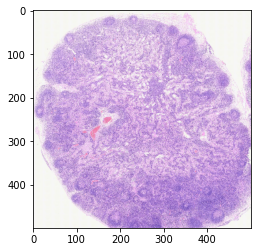

In [8]:
plt.imshow(image)

In [9]:
num_scenes = slide.num_scenes
for index in range(0, num_scenes):
   print(slide.get_scene(index).name)
#This implies that there is only one scene in the slide that is the image itself

Image


In [10]:
frames = scene.num_t_frames
frames
#This implies there is only one time frame that the images contain

1

In [11]:
z_slices = scene.num_z_slices
z_slices
#There is only one slice along the z-axis 

1

In [12]:
# Reading the normal lymphnode image using slideio
image_path_lymph = '/content/drive/MyDrive/Normal Lymphnode.svs'
slide = slideio.open_slide(image_path_lymph, "SVS")
scene = slide.get_scene(0)

In [13]:
raw_string = slide.raw_metadata
raw_string.split("|")

['Aperio Image Library v10.2.24\r\r\n35817x38693 [0,0 35817x38693] [256x256] JPEG/YCbCr Q = 75',
 'AppMag = 40',
 'MPP = 0.241158']

In [14]:
# the read_block function of the scene class can be used to downscale the image 
# read_block can also be used to break the image into tiles from the image as required.
image = scene.read_block((0,0,35000,35000), (500,500))

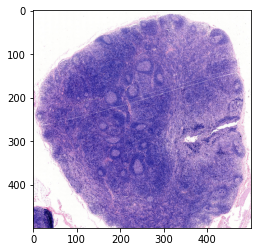

In [15]:
plt.imshow(image)

In [16]:
num_scenes = slide.num_scenes
for index in range(0, num_scenes):
   print(slide.get_scene(index).name)
#This implies that there is only one scene in the slide that is the image itself

Image


In [17]:
frames = scene.num_t_frames
frames
#This implies there is only one time frame that the images contain

1

In [18]:
z_slices = scene.num_z_slices
z_slices
#There is only one slice along the z-axis 

1

## Processing the image files 


### Task 1 : Making tiles out of the original slide image

In [19]:
# We will now break the reactive lymph node image into tiles of 1000*1000, and store these images in a dictionary, along with their coordinates
image_path_hyperplasia = '/content/drive/MyDrive/Reactive hyperplasia.svs'
slide = slideio.open_slide(image_path_hyperplasia, "SVS")
scene = slide.get_scene(0)
image_dict_reactive = {}
i = 0
j = 0
while i <= 26000:
  while j <= 27000:
    img = scene.read_block((i, j, i + 1000, j + 1000), (200, 200))
    coordinates = str([i, j, i+1000, j+1000])
    image_dict_reactive[coordinates] = img
    j = j + 1000
  i = i + 1000
  j = 0

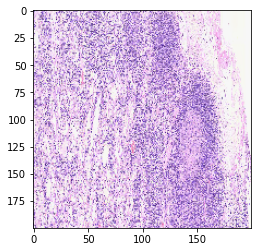

In [20]:
#To access any tile just enter the coordinates in the form of a string of list as follows
# Say for example we want to see the region from 10000, 2000 to 11000, 3000, we will use the following line of code
plt.imshow(image_dict_reactive['[10000, 2000, 11000, 3000]'])

In [21]:
# We will now break the normal lymph node image into tiles of 1000*1000, and store these images in a dictionary, along with their coordinates
image_path_lymph = '/content/drive/MyDrive/Normal Lymphnode.svs'
slide = slideio.open_slide(image_path_lymph, "SVS")
scene = slide.get_scene(0)
image_dict_normal = {}
i = 0
j = 0
while i <= 35000:
  while j <= 38000:
    img = scene.read_block((i, j, i + 1000, j + 1000), (200, 200))
    coordinates = str([i, j, i+1000, j+1000])
    image_dict_normal[coordinates] = img
    j = j + 1000
  i = i + 1000
  j = 0

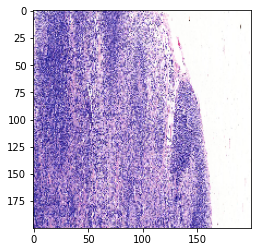

In [22]:
#To access any tile just enter the coordinates in the form of a string of list as follows
# Say for example we want to see the region from 17000, 2000 to 18000, 3000, we will use the following line of code
plt.imshow(image_dict_normal['[17000, 2000, 18000, 3000]'])

### Task 2 : Image processing on the tiled images

In [23]:
# We will try and normalise the tiles from two random samples of slides
img_sample_reactive = image_dict_reactive['[10000, 2000, 11000, 3000]']
img_sample_normal = image_dict_normal['[10000, 20000, 11000, 21000]']
img_sample_reactive_normalized = (img_sample_reactive / np.linalg.norm(img_sample_reactive)) * 255
img_sample_normal_normalized = (img_sample_normal / np.linalg.norm(img_sample_normal)) * 400

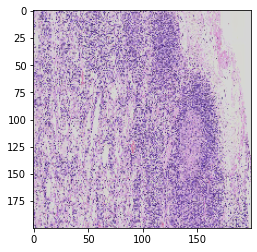

In [24]:
#plotting the normalised hyperplasia sample
plt.imshow(img_sample_reactive_normalized)

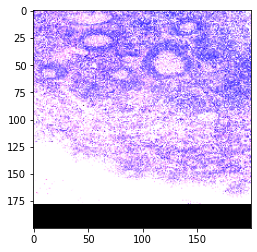

In [25]:
#plotting the normalised healthy lymph node sample
plt.imshow(img_sample_normal_normalized)

# NLP Task

## Importing the required libraries

In [26]:
!pip3 install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import time
import docx
import requests
import pandas as pd
from bs4 import BeautifulSoup

## Scraping data from url + Parsing with BeautifulSoup


In [28]:
headers = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
}
url = 'https://www.pathologyoutlines.com/'
req = requests.get(url, headers = headers)
home_page = BeautifulSoup(req.text, 'html.parser')
links = home_page.find_all('div', class_ = 'home_chapters surgical_pathology_chapters home_section_box home_section')

In [29]:
li = links[0].find_all('li')
link_list = []
name_list = []
for tag in li:
  link_tag = tag.find('a')
  link_list.append(link_tag.get('href'))
  name_list.append(tag.get_text())

## Making the dictionary + Word file

In [30]:
# Initialize a dictionary where, the key is the name of the organ and the values are the text extracted from the table of contents 
final_dict = {}
for organ in range(len(link_list)):
  req_organ = requests.get(link_list[organ], headers = headers)
  page_content = BeautifulSoup(req_organ.text, 'html.parser')
  values = page_content.find_all('div', class_ = 'page_content')
  dict_values = values[0].find_all('a')
  organ_values_list = []
  time.sleep(2)
  for value in dict_values:
    if value.get_text() == 'entire chapter':
      break   # we have to only include the list before the 'entire chapter' string, so we will break the loop if we encounter entire chapter 
    organ_values_list.append(value.get_text())
  final_dict[name_list[organ]] = organ_values_list

In [31]:
final_dict[name_list[0]]

['anatomy & embryology-adrenal',
 'anatomy-paraganglia',
 'books',
 'features to report-adrenal cortical carcinoma',
 'features to report-pheochromocytoma / paraganglioma',
 'histology-adrenal cortex',
 'histology-adrenal medulla',
 'staging-adrenal cortical carcinoma',
 'staging-neuroblastic tumors',
 'staging-pheochromocytoma & paraganglioma',
 'WHO classification',
 'primary adrenal insufficiency',
 'secondary adrenal insufficiency',
 'Addison disease',
 'adrenal hypoplasia',
 'adrenoleukodystrophy',
 'autoimmune adrenalitis',
 'Waterhouse-Friderichsen syndrome',
 'acquired adrenal cortical hyperplasia',
 'adrenal cytomegaly',
 'Beckwith-Wiedemann syndrome',
 'congenital adrenal hyperplasia',
 'Cushing syndrome',
 'hyperaldosteronism',
 'macronodular hyperplasia',
 'macronodular hyperplasia with marked adrenal enlargement',
 'micronodular hyperplasia',
 'pigmented adrenal cortical hyperplasia',
 'cysts',
 'adrenal rests',
 'focal adrenalitis',
 'ovarian thecal metaplasia',
 'adrenal

In [32]:
# Create an instance of a word document
word_doc = docx.Document()
  
# Add a Title to the document 
word_doc.add_heading('Organs for which the dictionary has been created', 0)
  
word_doc.add_heading('List of Organs', 3)
word_doc.add_paragraph(str(name_list),
                  style='List Number')
# Now save the document to a location 
word_doc.save('dict_organs.docx')